# Central Limit Theorem and Confidence Intervals - Introduction

## Introduction
In this section, you'll be introduced to inferential statistics. You'll learn about sampling, the central limit theorem, and the T-distribution.

## Distributions and Sampling

In this section, we're returning to statistics to broaden and deepen our understanding of distributions and sampling.

### Sampling

We'll start by providing an introduction to the idea of **_Sampling_** - selecting a subset of a population to survey.  We'll then start to introduce some statistics related to sampling by explaining and showing how to calculate the standard error.

### The Central Limit Theorem

Once we understand a bit about sampling, we'll explore how we can use it by digging deep into one of the coolest and most important concepts in inferential statistics--the **_Central Limit Theorem_**! We'll start by learning about how the Central Limit Theorem works, and explore how we can use it in a way that allows us to treat non-normal distributions as normal distributions, and provides a way for us to estimate parameters about a population.

### The T-Distribution

Finally, we'll end this section by learning about how we can use the **_T-Distribution_** for dealing with samples that are smaller, and that have an unknown standard deviation. We'll explore how the T-Distribution works, learn about *degrees of freedom*, and then see how we can calculate confidence intervals using our newfound knowledge of the T-Distribution. 

# Sampling Theory

Better data; not more data!

**Sample:** A set of observations drawn from a population, it should represent the population well.

**Population:** Target group.

**Sampling distribution:** A probability distribution of a statistics obtained through a large number of samples drawn from a specific population.

**Central limit theorem:** A statistical theory which states that when a sufficiently large sample size is given from a population with a finite level of variance; the mean of all samples from the same population will be approximately equal to the mean of the population.

# Sample 
+ Crate a random population of 10000:

In [1]:
import numpy as np

In [2]:
np.random.seed(10)
mypopulation = np.random.randint(0,80, 10000)

In [3]:
# lets look at the first 1 - 10 populations
mypopulation[1:10]

array([15, 64, 28, 29,  8, 73,  0, 40, 36])

### Choose a sample from that population:

In [4]:
np.random.seed(10)
mysample = np.random.choice(a = mypopulation, size = 100)
mysample[1:10]

array([49, 20, 51, 47, 70, 51, 59, 49, 66])

# Compare the sample mean and the population mean

In [5]:
mysample.mean()

38.72

In [6]:
mypopulation.mean()

39.1523

# Sampling Exercise

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../../data/titanic.csv')
print(len(df))
df.head()

891


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# If we take a look at the population mean age we have:

In [13]:
df.Age.mean()

29.69911764705882

### Let's see what happens when we take a sample in order to estimate this population parameter. (Again remember, this is called a point estimate!)

In [28]:
sample = df.sample(n=50, random_state=22) # Take a sample of 50 people from the data
sample.Age.mean() # Calculate the sample mean

27.79268292682927

+ It's not a bad estimate, even though it's not exact. From here we can start to ask many questions related to how confident we are in this estimate. A first simple approach is to quantify our estimate. We'll first look at the percent error:

In [29]:
err = np.abs(sample.Age.mean() - df.Age.mean())
per_err = err / df.Age.mean()
print(per_err)

0.06419162827951391


+ As it stands, our estimate is close but about 6% off of the actual figure. We might start to wonder whether this is a *normal* or expected error for our sample to be off. Can we say that a sample of 50 from a population of roughly 900 will always produce a point estimate this accurate? To simulate this, let's repeat this process of taking a sample (let's stick with 50 people for now) and save all of these sample means and see what happens.

In [30]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i) # Take a sample of 50 people
    sample_means.append(sample.Age.mean()) # Calculate the sample mean

### The first thing we'll look at is the distribution of our sample means.

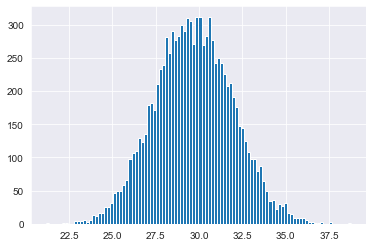

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style=None , rc=None) #Pretty background including grid lines for our backdrop
plt.hist(sample_means, bins=100);

+ Interesting! The first thing to note here is that the sample means form a normal distribution! What's more, let's take a look at the mean of our sample means:

In [36]:
import numpy as np
np.mean(sample_means)

29.678139189972246

+ 
Wow! Look at that! The mean of our sample means is extremely close to the actual mean of the population! The mean of means of this simulation shows an accuracy of 99.9%

In [37]:
population_mean = df.Age.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9992936336582157


# Central Limit Theorem

## Introduction

In this lesson, we'll start to investigate a *central* statistical concept; the central limit theorem! (And how to write a good dry math pun.)

## Objectives
You will be able to:
* Describe how the central limit theorem is related to sampling
* Describe how the central limit theorem can be used for parameter estimation

## What does the Central Limit Theorem stand for?

The central limit theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases. This becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters. For example, as we saw in the previous lecture, the averages of samples will form a normal distribution. We can then use this information to put further bounds on our estimates of the population. We can also use this information to estimate the probability of samples taking on extreme values that deviate from the population mean.  

For example, let's say that we know the mean and standard deviation of asthma rates in the United States. If we then take a sample from a specific city and find that the mean of this sample is substantially lower than that of the overall population, we may be interested in questions such as "what is the probability that this was just caused by random chance in sampling?" If the probability is exceedingly low, we have further reason to believe that this city has higher rates of asthma and that its population is statistically different then that of the general population.  

The computation would be something like this: we know the mean population, and by the central limit theorem, the average of various samples takes on a normal distribution. From that normal distribution of sample means, we can then compare the mean of our actual sample and compare it to the distribution of means. It should be quite rare that our sample mean falls outside 2 or 3 standard deviations from the mean of sample means, (roughly 2.35% and .15% respectively for each tail). As such, having a sample mean that falls outside of these scopes is worthy of further investigation.

For reference, here's is a rough empirical rule for percentiles within a normal distribution. (And again, by the central limit theorem, we expect our sample means to take on a normal distribution!)

<img src="../../../images/new_CentralLimitTheorem.png" width="600">

## Additional Resources

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability13.html

# Central Limit Theorem Exercise

> In this exercise, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives
You will be able to:
* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

In [57]:
data = pd.read_csv('../../../data/non_normal_dataset.csv' , squeeze=True)
data.head()

0     5
1     3
2     3
3     1
4    13
Name: 3, dtype: int64

In [40]:
len(df)

10000

## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sample distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

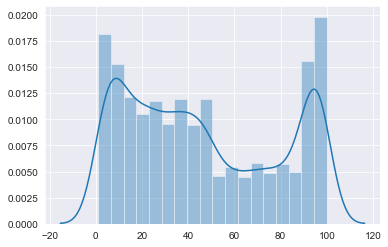

In [41]:
sns.distplot(df);

We can see from the above, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [45]:
import scipy.stats as stats

In [46]:
stats.normaltest(df)

NormaltestResult(statistic=array([43432.81112653]), pvalue=array([0.]))

> The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

> Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sample Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`.

In [58]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

# note this will keep changing as you run them as its randomly selecting samples
test_sample = get_sample(data, 30)  
print(test_sample[:5]) 

[72, 24, 10, 17, 93]


# Generating a Sample Mean
+ Next, we'll write another helper function that takes in a sample and returns the mean of that sample.

In [59]:
def get_sample_mean(sample):
    return sum(sample) / len(sample)

test_sample2 = get_sample(data, 30)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 

47.56666666666667


### Creating a Sample Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sample distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sample distribution of sample means of the given size.  

In [61]:
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

test_sample_dist = create_sample_distribution(data)
print(test_sample_dist[:5]) 

[50.36666666666667, 50.2, 50.9, 40.9, 47.8]


## Visualizing the Sample Distribution as it Becomes Normal

The sample distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sample distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sample distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sample distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sample distribution with `distplot`.

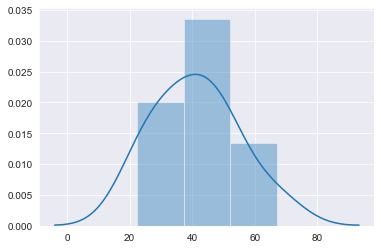

In [62]:
# Visualize sample distribution with n=3, 10, 30, across across mutliple iterations
sample_dist_10 = create_sample_distribution(data, 10, 3)
sns.distplot(sample_dist_10);

### Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.

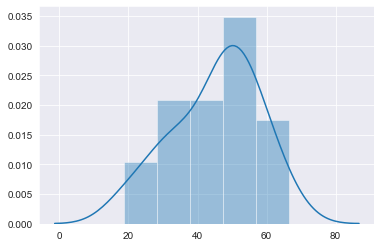

In [64]:
sample_dist_30 = create_sample_distribution(data, 30, 10)
sns.distplot(sample_dist_30);

+ The data is already looking much more 'normal' than the first sample distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

### In the cell below, create another sample distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

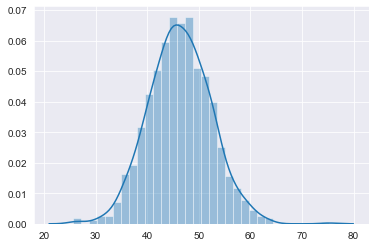

In [65]:
sample_dist_1000 = create_sample_distribution(data, 1000, 30)
sns.distplot(sample_dist_1000);

Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sample distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

+ In this exercises, we learned about Population and Sampling. 

+ We learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  